<a href="https://colab.research.google.com/github/AlexeyUdod/mds/blob/master/mds_03_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание




Уровень 1:
Найдите спектральное разложение матрицы:
m = np.array([[1, 2],
[2,3]])
print(m)
 

In [124]:
m = np.array([[1, 2],
[2,3]])
print(m)

[[1 2]
 [2 3]]



Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE. *

У PCA есть метод transform и inverse_transofrm. Первый - снижает размерность, второй - восстанавливает оригинальные данные с потерей информации
Надо посчитать насколько в среднем точно восстанавливается оригинальная картинка в зависимости от количества компонент в PCA
В качестве справки можно использовать:

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - документация по PCA
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html  - документация по MSE
	
  Картинки цифр можно взять отсюда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


In [0]:
import sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [0]:
mnist = load_digits().data

In [55]:
mnist[2]

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

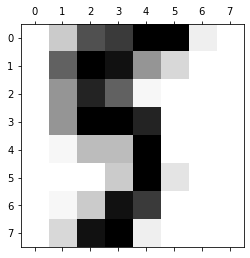

In [69]:
plt.matshow(mnist[15].reshape(8,8), cmap ='Greys')

In [102]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
results = pd.DataFrame()
for i in range(int(mnist.shape[1]**0.5)):
  for n in range(mnist.shape[0]):

    m = mnist[n].reshape(8,8)

    pca = PCA(n_components=i)
    mt = pca.fit(m).transform(m)
    mv = pca.inverse_transform(mt)
    err = mse(m, mv)
    results = results.append({'err':err, 'i':i, 'digit':int(n%10)}, ignore_index=True)

In [0]:
results.digit = results.digit.astype(int)

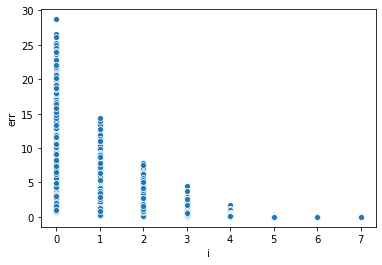

In [103]:
sns.scatterplot(results.i, results.err)

In [113]:
results

,digit,err,i
0,0,1.436719e+01,0.0
1,1,5.037109e+00,0.0
2,2,1.603125e+01,0.0
3,3,1.518945e+01,0.0
4,4,1.992578e+01,0.0
...,...,...,...
14371,2,1.295862e-29,7.0
14372,3,1.106023e-29,7.0
14373,4,4.497793e-30,7.0
14374,5,1.035688e-29,7.0


In [112]:
# средние значения ошибки при различных значениях количества компонент PCA
results.groupby('i').err.agg('mean')


i
0.0    1.575842e+01
1.0    6.543179e+00
2.0    2.471298e+00
3.0    7.630356e-01
4.0    1.664597e-01
5.0    2.053486e-02
6.0    1.515602e-04
7.0    1.024232e-29
Name: err, dtype: float64

In [125]:
# средние значения ошибки для различных цифр
results.groupby('digit').err.agg('mean')

digit
0    3.162721
1    3.448193
2    3.390156
3    3.193586
4    3.304075
5    3.209869
6    2.935659
7    3.019165
8    3.277095
9    3.212563
Name: err, dtype: float64

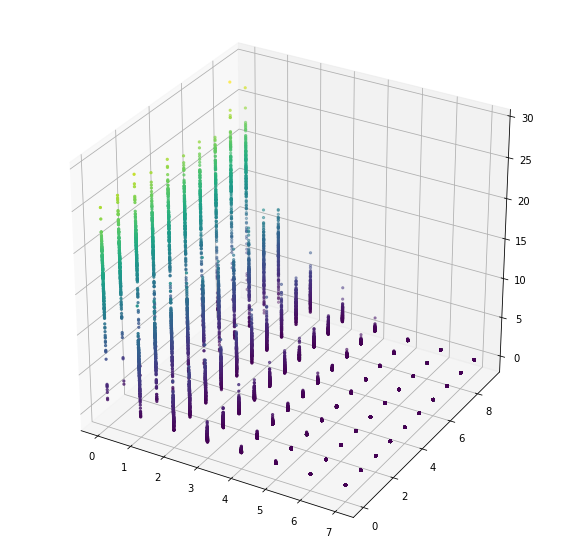

In [123]:
# общий график
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
x = results.i
y = results.digit
z = results.err
ax.scatter(x, y, z, c=z, marker='.')
plt.show()